In [35]:
import numpy as np
import TensorToolbox as DT
import matplotlib.pyplot as plt
import tt
%matplotlib inline

Problem = [1, 2, 3][0]

In [36]:
if Problem == 1:
    dimension = 2
    def f(x, params):
        return np.sum(_x**6 for _x in x)
elif Problem == 2:
    dimension = 2
    def f(x, params):
        return [x[0], x[1]]
else:
    raise NotImplemented("doof")

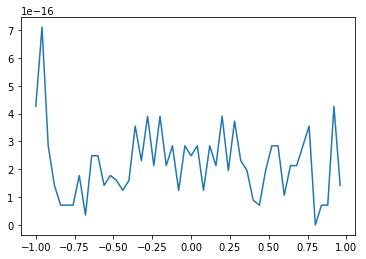

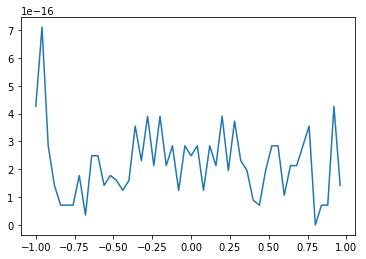

In [42]:
domain = [np.arange(-1, 1, 1./25) for i in range(dimension)]

TW = DT.TensorWrapper(f, domain)
approx = DT.TTvec(TW)
approx.build(eps=1e-10, method='ttdmrgcross', rs=None, fix_rank=False, Jinit=None, delta=1e-4, maxit=100, mv_eps=1e-6,
             mv_maxit=100, max_ranks=None, kickrank=None)
core_list = approx.TT

ten = tt.vector.from_list(core_list)
tt_approx = np.zeros(len(domain[0]))
tw_approx = np.zeros(len(domain[0]))
true_value = np.zeros(len(domain[0]))
for lia in range(len(domain[0])):
    x_dom = domain[0]

    tt_approx += [ten[_x, lia] for _x in range(len(x_dom))]
    true_value += [f([_x, x_dom[lia]], None) for _x in x_dom]
    tw_approx += [approx[_x, lia] for _x in range(len(x_dom))]
plt.figure()
plt.plot(x_dom, np.abs(np.array(tt_approx)-np.array(true_value))/len(domain[0]))
plt.figure()
plt.plot(x_dom, np.abs(np.array(tw_approx)-np.array(true_value))/len(domain[0]))